In [15]:
import numpy as np
import pandas as pd
from scipy.interpolate import *
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",120)
import scipy.stats as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
params={"figure.facecolor":(0.0,0.0,0.0,0),
        "axes.facecolor":(1.0,1.0,1.0,1),
        "savefig.facecolor":(0.0,0.0,0.0,0)}
plt.rcParams.update(params)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [16]:
df=pd.read_csv('weatherAUS.csv')
df = df.dropna()

In [17]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [18]:
sunshine = df["Sunshine"]
gustspeed = df["WindGustSpeed"]

In [19]:
sunshine = sunshine[0:100]
gustspeed = gustspeed[0:100]
gustspeed  = np.array(gustspeed) 
sunshine = np.array(sunshine)

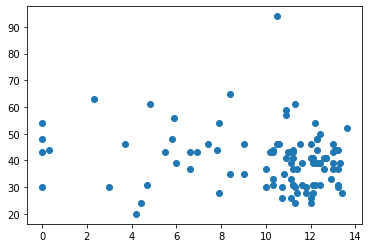

In [20]:
fig = plt.scatter(sunshine, gustspeed)

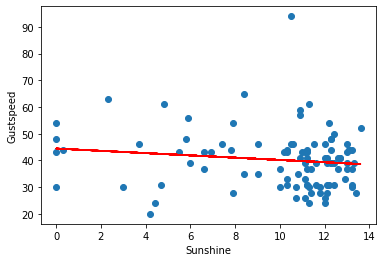

In [21]:


plt.xlabel('Sunshine')
plt.ylabel('Gustspeed')
y = gustspeed
x = sunshine
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color = "red")

In [25]:

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.861
Date:                Fri, 23 Apr 2021   Prob (F-statistic):              0.176
Time:                        19:36:26   Log-Likelihood:                -378.86
No. Observations:                 100   AIC:                             761.7
Df Residuals:                      98   BIC:                             766.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.4743      3.301     13.475      0.000      37.924      51.024
x1            -0.4270      0.313     -1.364      0.176      -1.048       0.194
==============================================================================
Omnibus:                       41.062   Durbin-Watson:                   1.324
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.629
Skew:                           1.350   Prob(JB):                     4.79e-31
Kurtosis:                       8.120   Cond. No.                         32.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""